In [7]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
##100 genes with 10 samples
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  272  241  232  270  256  321  348  313  316  332
gene2  276  288  299  298  274  705  708  756  667  704
gene3  663  681  655  720  641  190  173  197  195  198
gene4   83   87   76   86   84  626  619  630  661  644
gene5  860  845  825  859  879  806  802  852  807  814
(100, 10)


In [8]:
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 

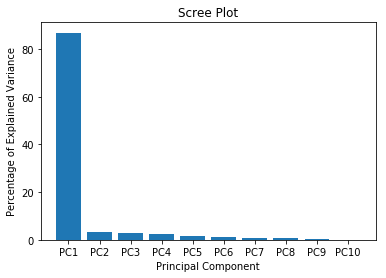

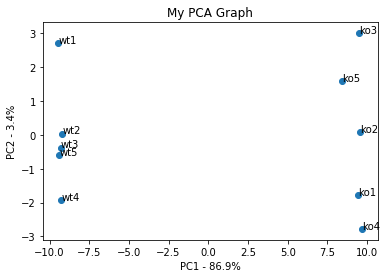

In [9]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [11]:
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene65    0.107233
gene24    0.107220
gene34   -0.107205
gene60   -0.107203
gene59    0.107188
gene38    0.107160
gene74   -0.107159
gene36   -0.107145
gene12   -0.107125
gene4     0.107115
dtype: float64
